# Chapter 3, Example 2

In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import os
if not os.path.isdir('figures'):
	os.makedirs('figures')

In [2]:
no_epochs = 500
lr = 0.4

SEED = 10
np.random.seed(SEED)

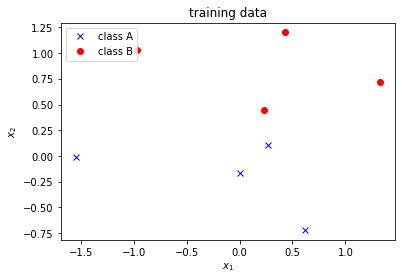

In [3]:
# training data
X = np.array([[1.33, 0.72], [-1.55, -0.01], [0.62, -0.72],
    [0.27, 0.11], [0.0, -0.17], [0.43, 1.2], [-0.97, 1.03], [0.23, 0.45]])
Y = np.array([0, 1, 1, 1, 1, 0, 0, 0]).reshape(8,1)

# plot training data
plt.figure(1)
plt.plot(X[Y[:,0]==1,0], X[Y[:,0]==1,1],'bx', label ='class A')
plt.plot(X[Y[:,0]==0,0], X[Y[:,0]==0,1],'ro', label='class B')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('training data')
plt.legend()
plt.savefig('./figures/3.2b_1.png')

In [4]:
class Logistic():
  def __init__(self):
    self.w = tf.Variable(np.random.rand(2,1), dtype=tf.float64)
    self.b = tf.Variable([0.], dtype=tf.float64)

  def __call__(self, x):
    return tf.sigmoid(tf.matmul(x, self.w) + self.b)

In [5]:
def loss(targets, logits):
  t_float = tf.cast(targets, tf.float64)
  losses = -tf.reduce_sum(t_float*tf.math.log(logits) + (1-t_float)*tf.math.log(1-logits))
  class_err = tf.reduce_sum(tf.cast(tf.not_equal(logits > 0.5, targets), tf.int32))
  return losses, class_err

In [6]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss, current_err = loss(outputs, model(inputs))
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign(model.w - learning_rate * dw)
  model.b.assign(model.b - learning_rate * db)

In [7]:
model = Logistic()

print(model.w.numpy(), model.b.numpy())

[[0.77132064]
 [0.02075195]] [0.]


In [8]:
entropy, err = [], []
for epoch in range(no_epochs):
  entropy_, err_ = loss(Y, model(X))
  entropy.append(entropy_), err.append(err_)
  
  train(model, X, Y, learning_rate=lr)

  if epoch%100 == 0:
      print('Epoch %2d:  loss=%2.5f'%(epoch, entropy[-1]))

Epoch  0:  loss=6.65218
Epoch 100:  loss=0.46219
Epoch 200:  loss=0.30571
Epoch 300:  loss=0.23153
Epoch 400:  loss=0.18663


In [9]:
# print learned weights
print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))

w: [[ -1.19890942]
 [-15.02004335]], b: [4.47257815]


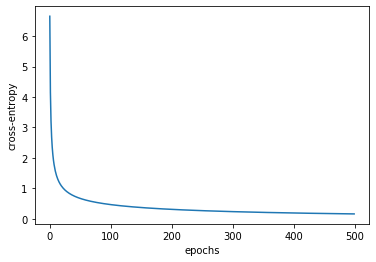

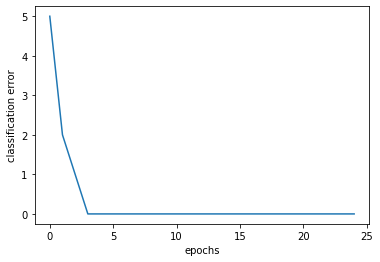

In [10]:
# plot learning curves
plt.figure(2)
plt.plot(range(no_epochs), entropy)
plt.xlabel('epochs')
plt.ylabel('cross-entropy')
plt.savefig('./figures/3.2b_2.png')

plt.figure(3)
plt.plot(range(25), np.array(err)[:25])
plt.xlabel('epochs')
plt.ylabel('classification error')
plt.savefig('./figures/3.2b_3.png')

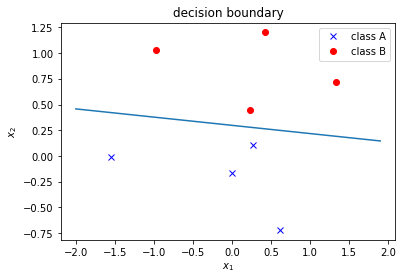

In [11]:
# plot the decision boundary
x1 = np.arange(-2, 2, 0.1)
x2 = -(x1*model.w.numpy()[0] + model.b.numpy())/model.w.numpy()[1]

plt.figure(4)
plt.plot(X[Y[:,0]==1,0], X[Y[:,0]==1,1],'bx', label ='class A')
plt.plot(X[Y[:,0]==0,0],X[Y[:,0]==0,1],'ro', label='class B')
plt.plot(x1, x2, '-')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('decision boundary')
plt.legend()
plt.savefig('./figures/3.2b_4.png')